#### VectorStoreIndex

In [6]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader

In [7]:
documents = SimpleDirectoryReader("files").load_data()

In [8]:
len(documents)

2

In [9]:
# Create index from documents.
index = VectorStoreIndex.from_documents(documents)
print("Index created successfully!")

Index created successfully!


Note that using this approach, we have skipped the Node parsing step entirely,
because the Index did that by itself by using the from_documents()method.

- use_async: This parameter enables asynchronous calls. By default, it is set to False.
- show_progress: This parameter shows progress bars during Index construction. The default
value is False.
- store_nodes_override: This parameter forces LlamaIndex to store Node objects in the Index store and document store, even if the vector store keeps text. This can be useful in scenarios where you need direct access to Node objects, even if their content is already stored in the vector store.
- The default setting for this parameter is False.

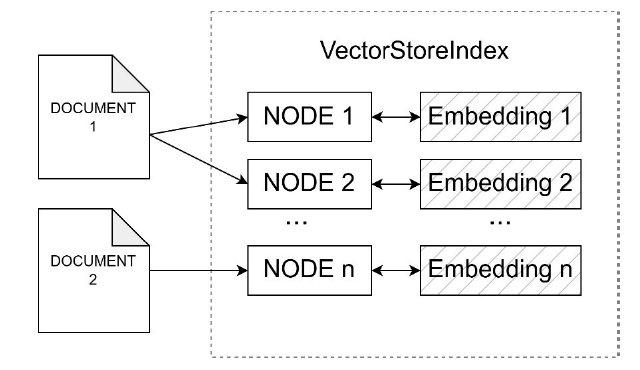

The `VectorStoreIndex` took the ingested Documents, breaking them down into `Nodes`. 

It used the default parameters for `text splitter`, `chunk size`, `chunk overlap`, and so on. 

The nodes containing chunks of the original text were then embedded into a high-dimensional vector
space using a language model. The embedded vectors were stored within the vector store component
of the Index. 

Next, when a query is made, the query text will be similarly embedded and compared
against the stored vectors using a similarity measure identified with a method called cosine similarity.

The most similar vectors – and thus the most relevant document chunks – will be returned as the
query result. 

This process enables rapid, semantically aware retrieval of information, leveraging the
mathematical properties of vector spaces to find the documents that best answer the user’s query.

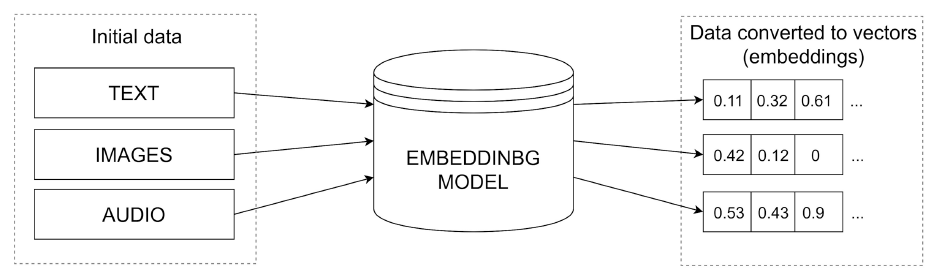

#### how does LlamaIndex generate these embeddings?

- By default, **LlamaIndex** uses OpenAI’s **text-embedding-ada-002** model for generating embeddings.
  - This model captures semantic meanings of text, supporting applications like **semantic search**, **topic clustering**, **anomaly detection**, and more.
  - It offers a good balance between **quality**, **performance**, and **cost**.
  - It is used for embedding documents during **Index construction** and for **query embeddings**.

- **Alternatives** may be necessary in certain scenarios:
  - **High Data Volume**: Cost of a hosted model might be too high.
  - **Data Privacy**: Preference for local models to avoid sending proprietary data to external services.
  - **Specialized Needs**: Requirement for models tailored to specific topics or domains.

- **Local Model Option**:
  - LlamaIndex supports local embedding models.
  - For instance, the default model from **Hugging Face** ([BAAI/bge-small-en-v1.5](https://huggingface.co/BAAI/bge-small-en-v1.5)) can be used for cost reduction or local processing needs.


In [10]:
pip install llama-index-embeddings-huggingface

  Using cached llama_index_embeddings_huggingface-0.3.1-py3-none-any.whl.metadata (718 bytes)
   ---------------------------------------- 0.0/762.2 kB ? eta -:--:--
   --- ------------------------------------ 71.7/762.2 kB 2.0 MB/s eta 0:00:01
   -------------- ------------------------- 276.5/762.2 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------  757.8/762.2 kB 6.0 MB/s eta 0:00:01
   ---------------------------------------- 762.2/762.2 kB 4.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
from llama_index.embeddings.huggingface import HuggingFaceEmbedding

https://huggingface.co/WhereIsAI/UAE-Large-V1

In [12]:
embedding_model = HuggingFaceEmbedding(
    model_name   = "WhereIsAI/UAE-Large-V1",
    cache_folder = r'D:\AI-DATASETS\07-Hugging-Face-Data'
)

In [13]:
embeddings = embedding_model.get_text_embedding(
    "The quick brown fox jumps over the lazy cat!"
    
)

In [14]:
len(embeddings)

1024

In [15]:
# Step 1: Choose a different model from Hugging Face
# Example: Using 'sentence-transformers/all-MiniLM-L6-v2' for sentence embeddings
embedding_model = HuggingFaceEmbedding(
    model_name   = "sentence-transformers/all-MiniLM-L6-v2",
    cache_folder = r'D:\AI-DATASETS\07-Hugging-Face-Data'
)

# Step 2: Get embeddings for a text
embeddings = embedding_model.get_text_embedding(
    "The quick brown fox jumps over the lazy cat!"
)

len(embeddings)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

D:\ANACONDA\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in D:\AI-DATASETS\07-Hugging-Face-Data\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

D:\ANACONDA\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

384

#### Key Points to Consider When Choosing an Embedding Model

**• Qualitative performance:**
   - Embedding models encode semantics differently.
   - General-purpose models like OpenAI's Ada offer broad text understanding.
   - Domain-specific models outperform in specialized areas, offering more accurate representations.

**• Quantitative performance:**
   - Evaluate how well the model captures semantic similarity and generalizes to unseen data.
   - Consult the **Massive Text Embedding Benchmark (MTEB) Leaderboard** for general benchmarks.
   - Benchmark information: https://huggingface.co/spaces/mteb/leaderboard.

**• Latency and throughput:**
   - Consider model speed for real-time applications or large data volumes.
   - Look at the maximum input chunk size the model can handle.
   - During retrieval, query embeddings are computed in real-time, impacting performance.

**• Multilingual support:**
   - Some models support multiple languages, while others are language-specific.
   - Smaller models like **Mistral** perform well for English but may underperform in other languages.

**• Resource requirements:**
   - Models vary in size and computational cost.
   - Larger models provide more accurate embeddings but may require more computational resources, leading to higher costs.

**• Availability:**
   - Some models are only available through certain APIs or specific software.
   - Ensure compatibility with your integration tools, such as LlamaIndex.

**• On-device or local usage:**
   - Local models are preferred when privacy is a concern or in low-internet environments.

**• Usage cost:**
   - Compare API call costs for hosted models versus computational and storage costs for local models.


https://docs.llamaindex.ai/en/stable/module_guides/models/embeddings.html#list-of-supportedembeddings

a complete list of supported models can be found here

####  Persisting and reusing Indexes

In [16]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader

In [17]:
documents = SimpleDirectoryReader("data").load_data()

In [18]:
index = VectorStoreIndex.from_documents(documents)

index.storage_context.persist(persist_dir="index_cache")
print("Index persisted to disk.")

Index persisted to disk.


In [19]:
from llama_index.core import StorageContext, load_index_from_storage
storage_context = StorageContext.from_defaults(persist_dir="index_cache")
index_loaded    = load_index_from_storage(storage_context)

print("Index loaded successfully!")

Index loaded successfully!


#### Understanding the StorageContext in LlamaIndex

**• The Document Store (docstore):**
   - Manages the storage of documents.
   - Data is stored locally in a file named **docstore.json**.

**• The Index Store (index_store):**
   - Manages the storage of index structures.
   - Indexes are stored locally in a file named **index_store.json**.

**• The Vector Stores (vector_stores):**
   - A dictionary managing multiple vector stores, potentially serving different purposes.
   - Stored locally in a file named **vector_store.json**.

**• The Graph Store (graph_store):**
   - Manages the storage of graph data structures.
   - A file named **graph_store.json** is created for storing graphs.

**• StorageContext Class:**
   - Encapsulates the document, vector, index, and graph stores.
   - Files are created automatically by calling the `persist()` method.
   - You can specify custom persistence locations for storing these files.

**• Customization Options:**
   - By default, basic local stores are used, but you can swap them with other solutions like **AWS S3**, **Pinecone**, **MongoDB**, etc.

**• Example: Customizing Vector Storage with ChromaDB**
   - ChromaDB is an efficient open-source vector engine that can be used for vector storage customization in LlamaIndex.
